In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# process by pandas
df = pd.read_csv('contributionData.zip',index_col=False)
df.drop('cmte_id', axis=1)
df=df.dropna(axis=1, how='any')
df=df.sort_values(['contb_receipt_dt','tran_id'])
df=df.drop('contbr_nm',axis=1)
counts=df['cand_nm'].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,11,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<Figure size 640x480 with 1 Axes>

Sanders, Bernard           979947
Warren, Elizabeth          434302
Buttigieg, Pete            344818
Yang, Andrew               249669
Biden, Joseph R Jr         202545
Harris, Kamala D.          169274
O’Rourke, Robert Beto       96830
Klobuchar, Amy J.           92593
Booker, Cory A.             77106
Gabbard, Tulsi              47605
Williamson, Marianne        41083
Castro, Julián              35371
Bennet, Michael F.          18728
Bullock, Steve              14711
Inslee, Jay R               13404
Gillibrand, Kirsten          7961
Hickenlooper, John W.        3903
Delaney, John K.             3721
Steyer, Tom                  2738
Moulton, Seth                2105
Ryan, Timothy J.             1798
Patrick, Deval               1538
Swalwell, Eric Michael       1162
Sestak, Joseph A. Jr.         863
de Blasio, Bill               832
Messam, Wayne Martin          110
Gravel, Maurice Robert         49
Ojeda, Richard Neece II        47
Name: cand_nm, dtype: int64


In [2]:
df1=df[df['cand_nm'].isin(['Sanders, Bernard','Warren, Elizabeth ','Buttigieg, Pete','Biden, Joseph R Jr','Gabbard, Tulsi','Steyer, Tom','Klobuchar, Amy J.'])]


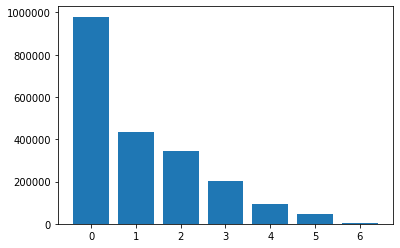

Sanders, Bernard      979947
Warren, Elizabeth     434302
Buttigieg, Pete       344818
Biden, Joseph R Jr    202545
Klobuchar, Amy J.      92593
Gabbard, Tulsi         47605
Steyer, Tom             2738
Name: cand_nm, dtype: int64


In [3]:
counts=df1['cand_nm'].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts)

In [4]:
df1.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Biden, Joseph R Jr    3.740849e+07
Buttigieg, Pete       4.139357e+07
Gabbard, Tulsi        3.963906e+06
Klobuchar, Amy J.     1.451430e+07
Sanders, Bernard      3.449763e+07
Steyer, Tom           7.893635e+05
Warren, Elizabeth     2.770172e+07
Name: contb_receipt_amt, dtype: float64

In [5]:
df1.to_csv("cleanContribData.csv", sep=',')

In [6]:
df2=df1[df1['contb_receipt_amt']>0]

In [14]:
df2=df2.drop(['cmte_id','tran_id','form_tp','file_num','cand_id'],axis=1)


In [15]:
df2.head()

,cand_nm,contbr_st,contb_receipt_amt,contb_receipt_dt
2374181,"Buttigieg, Pete",NY,250.0,01-APR-19
2320774,"Buttigieg, Pete",MD,200.0,01-APR-19
2371176,"Buttigieg, Pete",NY,25.0,01-APR-19
2298882,"Buttigieg, Pete",LA,18.0,01-APR-19
2274892,"Buttigieg, Pete",IL,500.0,01-APR-19


In [16]:
df2.to_csv(r'demContributionData.csv')